In [57]:
import numpy as np
from utils.units import *
from utils.consts import *
from matplotlib import pyplot as plt

import os,sys
import csv

In [64]:
rows = []
with open(os.path.join('data','HoloOr_464_3mm_waist.csv')) as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 5: 
            print(row)
        try:
            [float(r) for r in row if r != '']
            rows.append(row)
        except ValueError:
            pass

['-0.37361590', '0.00000297', '', '-0.35914700', '0.00000252', '', '-0.34467810', '0.00000337', '', '-0.33020920', '0.00000279', '', '-0.31574030', '0.00000373', '', '-0.30127140', '0.00000288', '', '-0.28680250', '0.00000431', '', '-0.27233360', '0.00000296', '', '-0.25786470', '0.00000522', '', '-0.24339580', '0.00000251', '', '-0.22892690', '0.00000703', '', '-0.21445800', '0.00000203', '', '-0.19998900', '0.00001014', '', '-0.18552010', '0.00000208']


In [65]:
cols_temp = np.array(rows).transpose()
cols = []
for col in cols_temp:
    if col[0] != '':
        cols.append(col)

# each row is a different axial plane
x_coords = []
intensities = []

for i, col in enumerate(cols):
    if i % 2:
        intensities.append(col)
    else:
        x_coords.append(col)

intensities = np.array(intensities).astype(float)
x_coords = np.array(x_coords).astype(float)

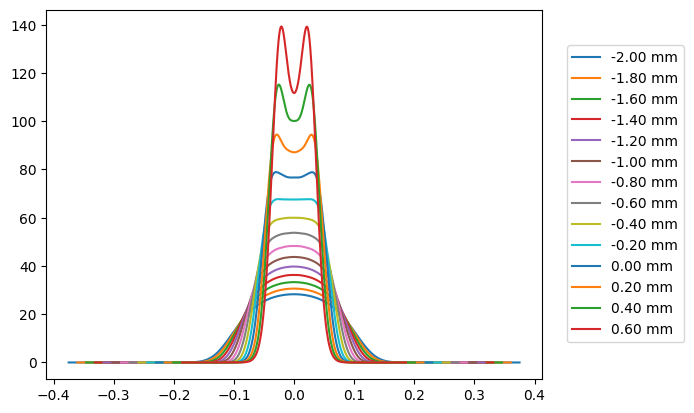

In [66]:
fig, ax = plt.subplots()
dz = 0.2
z0 = -2
for iz in range(intensities.shape[0]):
   ax.plot(x_coords[iz], intensities[iz], label=f'{z0 + dz*iz:.2f} mm')
ax.legend(loc=(1.05,0.1))

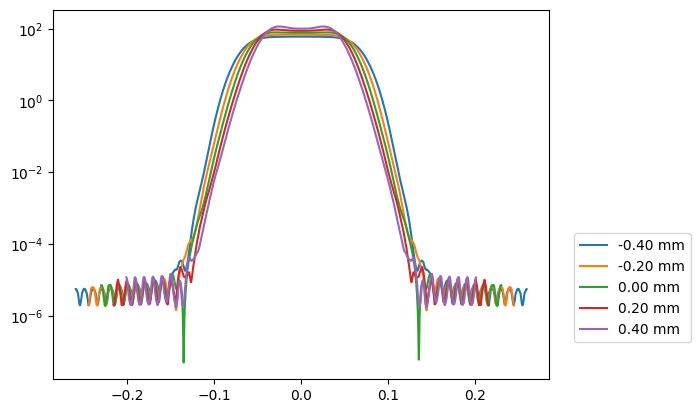

In [70]:
fig, ax = plt.subplots()
dz = 0.2
z0 = -2
zmin = -0.5
zmax = -zmin
for iz in range(intensities.shape[0]):
    z = z0 + dz*iz
    if zmin < z < zmax:
        ax.plot(x_coords[iz], intensities[iz], label=f'{z:.2f} mm')
ax.set_yscale('log')
ax.legend(loc=(1.05,0.1))

In [63]:
intensities[0].shape

(2047,)